**Data Collection Information**


Data collection was completed using Nortek’s Signature 1000 HR (High Resolution) ADCP. Two ADCPs were deployed, named S0_103080 and S1_101481. The ADCPs collected data of water column currents, waves, and water levels at 4 Hz. A table is shown below with information on each sensor.


**Interpreting Data**

The ADCP automatically breaks the data stream up into multiple files, with each file being 1 gigabyte in size. This results in several groups of. Within each group, there are HDF5 files for each variable of interest. The data can be read by using Pandas to convert from a HDF5 file to a Pandas Dataframe.



Here is an example on how to read in and interpret data from Group1:

In [37]:
# Import necessary packages
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [9]:
# Establish directory and filenames
directory_path=r"/Volumes/kanarde/BOEM/BHBoemData/Processed/S0_103080/Group1" # this will need to be changed per computer/user and per group
files=os.listdir(directory_path) # list of files in Group1
print(files) # prints out a list of all of the data files within Group 1


['AbsVel.h5', 'CellDepth.h5', 'EastVel.h5', 'ErrVel.h5', 'NorthVel.h5', 'Time.h5', 'VertVel.h5', 'Heading.h5', 'Pitch.h5', 'Pressure.h5', 'Roll.h5']


In [15]:
# Here we are going to read in the HDF5 files containing data
# create a dictionary to store files
data={}
for file in files:
    # file path
    file_path = os.path.join(directory_path, file)
    # read the file into a Pandas dataframe
    df=pd.read_hdf(file_path)
    # file name 
    file_name=file_path.split('/')[-1].split('.')[0]
    print(file_name)
    # store dataframe
    data[file_name]=df



AbsVel
CellDepth
EastVel
ErrVel
NorthVel
Time
VertVel
Heading
Pitch
Pressure
Roll


In [16]:
# Now we can look at each parameter in our data dictionary
print(data['AbsVel']) # example shown with Absolute Velocity
# We will use this more later


              0         1         2         3         4         5         6   \
0            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
345595  0.174225  0.229429  0.171379  0.186742  0.526882  0.202831  0.245317   
345596  0.094579  0.179882  0.145588  0.286287  0.756010  0.943179  0.954356   
345597  0.207274  0.343940  0.146397  0.586909  1.134467  0.964396  0.900018   
345598  0.178417  0.135677  0.084975  0.225680  0.348949  0.240426  0.070925   
345599  0.093963  0.275459  0.159054  0.194653  0.747966  0.655495  0.479443   

              7         8         9   .

We have now put all of the files from Group1 into a Python Dictionary and can call them as individual dataframes. Each variable is described below.

**CellDepth**: This represents the nominal depth of each cell. Within each cell, the ADCP collects an average value of velocity and pressure. The CellDepth data frame is 1 column and has rows equal to the number of cells until the water surface. This is possible because the number of cells does not change over time.



The dataset will need to be expanded to have as many columns as the rest of the collected variables to be used in plotting. 



In [111]:
# Lets look at celldepth
print(data['CellDepth'])

30


In [25]:
# Now we can expand to have as many columns as the rest of the data (over time)
n=len(data['AbsVel'])
print(n)
df=data['CellDepth']
CellDepth = pd.DataFrame(np.repeat(df.values, n, axis=1), columns=np.tile(df.columns, n))
print(CellDepth)

345600
       0     0     0     0     0     0     0     0     0     0  ...     0  \
0    0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6  ...   0.6   
1    1.1   1.1   1.1   1.1   1.1   1.1   1.1   1.1   1.1   1.1  ...   1.1   
2    1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6  ...   1.6   
3    2.1   2.1   2.1   2.1   2.1   2.1   2.1   2.1   2.1   2.1  ...   2.1   
4    2.6   2.6   2.6   2.6   2.6   2.6   2.6   2.6   2.6   2.6  ...   2.6   
5    3.1   3.1   3.1   3.1   3.1   3.1   3.1   3.1   3.1   3.1  ...   3.1   
6    3.6   3.6   3.6   3.6   3.6   3.6   3.6   3.6   3.6   3.6  ...   3.6   
7    4.1   4.1   4.1   4.1   4.1   4.1   4.1   4.1   4.1   4.1  ...   4.1   
8    4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6  ...   4.6   
9    5.1   5.1   5.1   5.1   5.1   5.1   5.1   5.1   5.1   5.1  ...   5.1   
10   5.6   5.6   5.6   5.6   5.6   5.6   5.6   5.6   5.6   5.6  ...   5.6   
11   6.1   6.1   6.1   6.1   6.1   6.1   6.1   6.1   6.1   6.1  ...  

**Time**: This variable has the date and times for every measurement made by the ADCP, it is stored in python’s datetime structure.

**Heading, Pitch, and Roll (deg)**: These variables represent the orientation of the sensor. Since the sensor was bottom mounted, it should remain constant throughout the deployment. If they are not constant, then the sensor has moved and appropriate corrections will need to be made. 


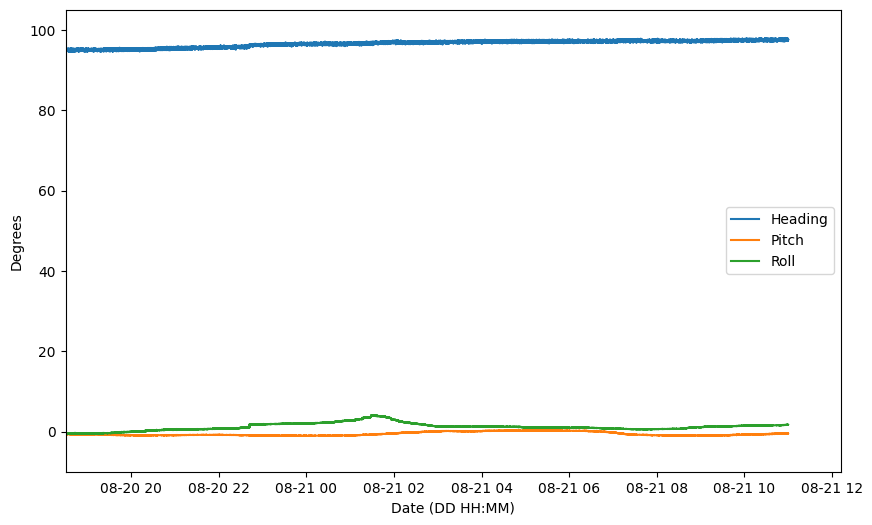

In [72]:
# Plot Heading, Pitch, and Roll over time
plt.figure(figsize=(10,6))
plt.plot(data['Time'],data['Heading'], label='Heading')
plt.plot(data['Time'],data['Pitch'], label='Pitch')
plt.plot(data['Time'],data['Roll'], label='Roll')
plt.xlabel('Date (DD HH:MM)')
plt.ylabel('Degrees')
plt.ylim(bottom= -10, top =105)
plt.xlim(left=datetime.datetime(2024,8,20,18,30)) # This is here for group 1 only to cut out transportation of sensor
plt.legend()
plt.show()

In Group1, Heading and Pitch remain relatively constant, as expected. There are slight changes in Roll that can be identified from the graph.

**AbsVel(m/s)**: This is the absolute velocity. The absolute velocity is the magnitude of all the components measured. This field is useful for seeing broad trends in flow rates.  


In [98]:
# create a meshgrid of time and celldepth
x,y=np.meshgrid(data['Time'],data['CellDepth'])
z=data['AbsVel']

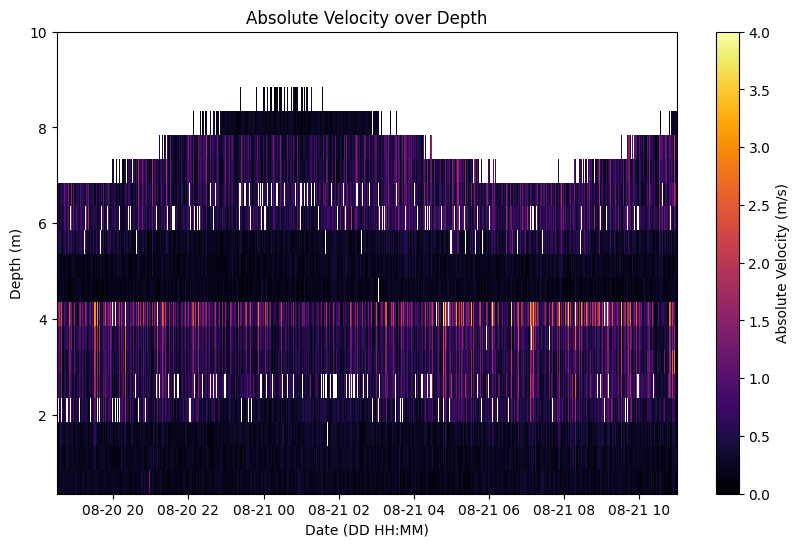

In [112]:
# Plot Velocity over time per cell
plt.figure(figsize=(10,6))
plt.pcolormesh(
    x,y,z.T, cmap='inferno', shading='nearest', vmin=0, vmax=4
)
plt.xlim(left=datetime.datetime(2024,8,20,18,30))
plt.ylim(top=10)
plt.xlabel("Date (DD HH:MM)")
plt.ylabel("Depth (m)")
plt.title('Absolute Velocity over Depth')
im1=plt.colorbar()
im1.ax.set_ylabel("Absolute Velocity (m/s)")
plt.show()

**VertVel(m/s)**: This is the vertical component of the velocities measured using beam 3. We can create a similar plot to the one above.


In [114]:
# create a meshgrid of time and celldepth
x,y=np.meshgrid(data['Time'],data['CellDepth'])
z=data['VertVel']

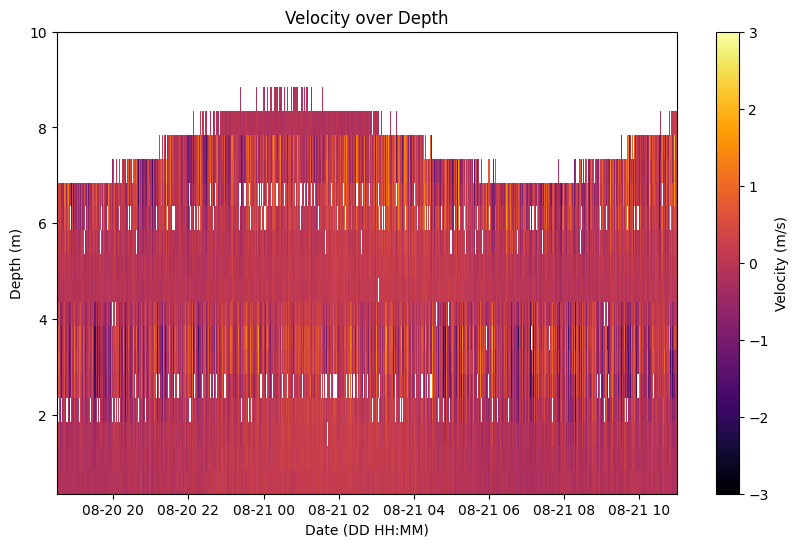

In [117]:
# Plot Velocity over time per cell
plt.figure(figsize=(10,6))
plt.pcolormesh(
    x,y,z.T, cmap='inferno', shading='nearest', vmin=-3, vmax=3 
) 
plt.xlim(left=datetime.datetime(2024,8,20,18,30))
plt.ylim(top=10)
plt.xlabel("Date (DD HH:MM)")
plt.ylabel("Depth (m)")
plt.title('Velocity over Depth')
im1=plt.colorbar()
im1.ax.set_ylabel("Velocity (m/s)")
plt.show()

**EastVel and NorthVel**: These are the east and north velocity components and can be used to assess phase wrapping. This can be done by creating distribution plots of each component. 

These are each 345600 rows x 30 columns, where the rows represent collection time and the columns represent each cell. 


**ErrVel (m/s)**: The error velocity is made by using two different beams to measure the same velocity component, in our case the vertical velocity, and finding the difference between each. This means that if you are seeing large ErrVel values you likely have a beam failure or something interfering with the beam. Values of ~.1 are acceptable since the values are measured in slightly different locations due to the different angles of the beam. 
This dataframe is 345600 rows x 30 columns, where the rows represent collection time and the columns represent each cell. 

In [89]:
# create a meshgrid of time and celldepth
x,y=np.meshgrid(data['Time'],data['CellDepth'])
z=data['ErrVel']


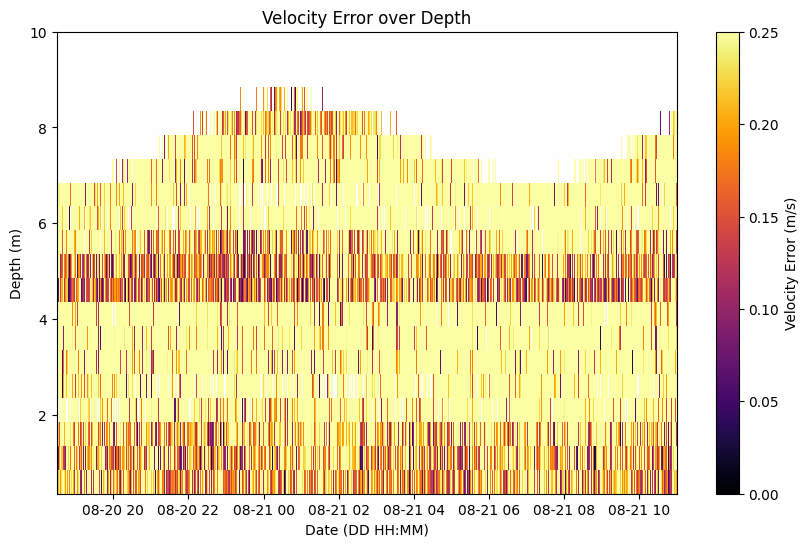

In [102]:
# Plot
plt.figure(figsize=(10,6))
plt.pcolormesh(
    x,y,z.T, cmap='inferno', shading='nearest', vmin=0, vmax=0.25
)
plt.xlim(left=datetime.datetime(2024,8,20,18,30))
plt.ylim(top=10)
plt.xlabel("Date (DD HH:MM)")
plt.ylabel("Depth (m)")
plt.title('Velocity Error over Depth')
im1=plt.colorbar()
im1.ax.set_ylabel("Velocity Error (m/s)")
plt.show()

**Pressure(db)**: The Pressure variable represents the pressure that the sensor “feels” above it. It can be plotted for a quick check.



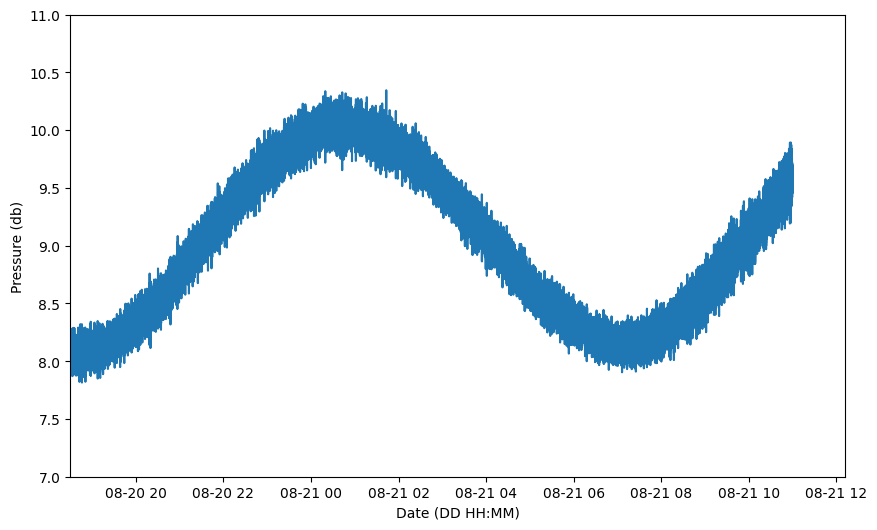

In [118]:
plt.figure(figsize=(10,6))
plt.plot(data['Time'],data['Pressure'])
plt.xlabel("Date (DD HH:MM)")
plt.xlim(left=datetime.datetime(2024,8,20,18,30))
plt.ylabel('Pressure (db)')
plt.ylim(bottom=7, top=11)
plt.show()

Deriving the water depth from pressure is a 1:1 conversion using the hydrostatic pressure equation. 

In [53]:
# convert db to Pa
pressure_Pa=data['Pressure']*10000
# gravitational constant
g=9.81 # (m/s)
# density of sea water 
rho=1024 # (kg/m^3)
# use hydrostatic pressure equation to relate pressure to depth (P=rho*g*h)
depth=pressure_Pa/(g*rho)

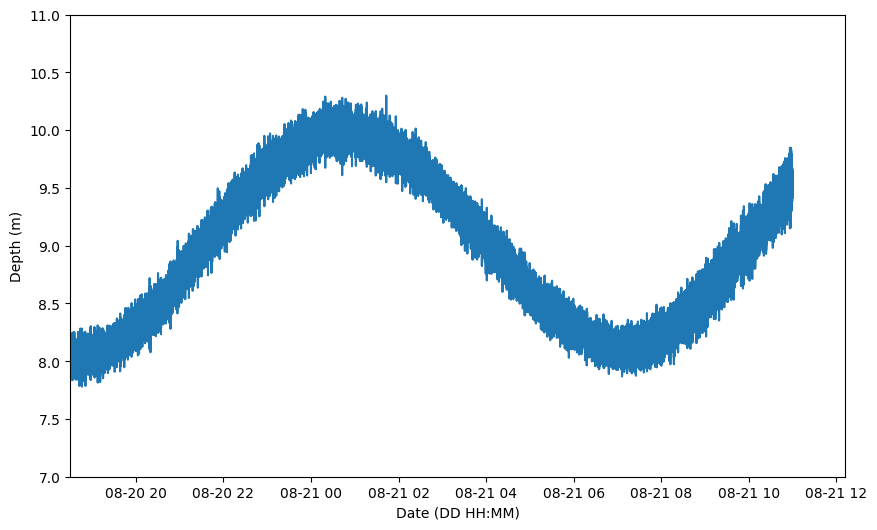

In [119]:
plt.figure(figsize=(10,6))
plt.plot(data['Time'],depth)
plt.xlabel("Date (DD HH:MM)")
plt.xlim(left=datetime.datetime(2024,8,20,18,30))
plt.ylabel('Depth (m)')
plt.ylim(bottom=7, top=11)
plt.show()

**Trends in Data**

We can also look at trends by combining all of the groups together.

In [123]:
import glob

In [128]:
# Establish directory and filenames
directory_path=r"/Volumes/kanarde/BOEM/BHBoemData/Processed/S0_103080" # this will need to be changed per computer/user
pattern="Group*"
groups=[]
for filename in glob.glob(f"{directory_path}/{pattern}"):
    filename=filename.split('/')[-1].split('.')[0]
    groups=filename
print(groups) # prints out a list of all of the data files within S0_103080

Group35


In [122]:
data={}
for group in groups:
    group_file_path=os.path.join(directory_path, group)
    files=os.listdir(group_file_path)
    for file in files:
        file_path = os.path.join(group_file_path, file)
        df=pd.read_hdf(file_path)
        file_name=file_path.split('/')[-1].split('.')[0]
        data[file_name]=df
    

NotADirectoryError: [Errno 20] Not a directory: '/Volumes/kanarde/BOEM/BHBoemData/Processed/S0_103080/.DS_Store.h5'

In [ ]:
data={}
for file in files:
    # file path
    file_path = os.path.join(directory_path, file)
    # read the file into a Pandas dataframe
    df=pd.read_hdf(file_path)
    # file name 
    file_name=file_path.split('/')[-1].split('.')[0]
    print(file_name)
    # store dataframe
    data[file_name]=df


In [ ]:
 # file path
    file_path = os.path.join(directory_path, file)
    # read the file into a Pandas dataframe
    df=pd.read_hdf(file_path)
    # file name 
    file_name=file_path.split('/')[-1].split('.')[0]
    print(file_name)
    # store dataframe
    data[file_name]=df